In [1]:
# Install necessary libraries
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.8 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=cef46a2eb997de7859d6395b21663015b06e9726bad91bdf5b21df0514c04b48
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which i

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_12/adult_with_headers.csv")

# 1. Data Exploration and Preprocessing

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0        

In [5]:
# Display basic information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Display summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:
# Explore unique values in the target column (income)
print("\nUnique values in 'income' column:", df['income'].unique())


Unique values in 'income' column: [' <=50K' ' >50K']


In [8]:
# Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


# Data Scaling

In [9]:
# Standard Scaling for numerical features
scaler_standard = StandardScaler()
df['age'] = scaler_standard.fit_transform(df[['age']])
df['fnlwgt'] = scaler_standard.fit_transform(df[['fnlwgt']])
df['education_num'] = scaler_standard.fit_transform(df[['education_num']])

In [10]:
# Min-Max Scaling for numerical features with non-negative values
scaler_minmax = MinMaxScaler()
df['capital_gain'] = scaler_minmax.fit_transform(df[['capital_gain']])
df['capital_loss'] = scaler_minmax.fit_transform(df[['capital_loss']])
df['hours_per_week'] = scaler_minmax.fit_transform(df[['hours_per_week']])

In [11]:
# Display updated information about the dataset
print("\nUpdated dataset information after scaling:")
df.info()


Updated dataset information after scaling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# Pros and Cons of Scaling Techniques:
# Standard Scaling: Suitable when data contains both positive and negative values. Assumes Gaussian distribution.
# Min-Max Scaling: Preferred when data is non-negative and lies within specific ranges.

# 2. Encoding Techniques

In [13]:
# Apply One-Hot Encoding to categorical variables with less than 5 categories
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [14]:
# Apply Label Encoding to categorical variables with more than 5 categories
le = LabelEncoder()
label_encode_columns = ['workclass', 'education', 'marital_status', 'native_country', 'occupation', 'race', 'relationship']
for col in label_encode_columns:
    df[col] = le.fit_transform(df[col])

In [15]:
# Encode the target variable 'income'
df['income'] = df['income'].str.strip()  # Remove any extra whitespace
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [16]:
# Verify the transformation
print("\nUnique values in 'income' after encoding:", df['income'].unique())


Unique values in 'income' after encoding: [0 1]


In [17]:
# Pros and Cons:
# One-Hot Encoding: Prevents ordinal relationships but can lead to high dimensionality with many categories.
# Label Encoding: Compact and memory-efficient but introduces ordinal relationships, which might mislead non-tree-based models.

# 3. Feature Engineering

In [18]:
# Create new features
df['education_hours'] = df['education_num'] * df['hours_per_week']  # Interaction feature
df['high_capital_gain'] = np.where(df['capital_gain'] > 0.5, 1, 0)  # Binary feature


In [19]:
# Apply log transformation to reduce skewness in 'fnlwgt'
df['log_fnlwgt'] = np.log1p(df['fnlwgt'])

In [20]:
# Verify the new features
print("\nNewly created features:")
print(df[['education_hours', 'high_capital_gain', 'log_fnlwgt']].head())


Newly created features:
   education_hours  high_capital_gain  log_fnlwgt
0         0.451580                  0         NaN
1         0.138948                  0         NaN
2        -0.167167                  0    0.219199
3        -0.476540                  0    0.354734
4         0.451580                  0    0.878869


# 4. Feature Selection

In [21]:
# Impute missing values in numerical columns
num_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[num_columns] = imputer.fit_transform(df[num_columns])

In [22]:
# Verify no missing values in numerical columns
print("\nMissing values after imputation:\n", df[num_columns].isnull().sum())


Missing values after imputation:
 age                  0
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
sex_ Male            0
education_hours      0
high_capital_gain    0
log_fnlwgt           0
dtype: int64


In [23]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df[num_columns])
df['outlier'] = outliers

In [24]:
# Remove outliers
df = df[df['outlier'] == 1].drop(columns=['outlier'])
print("\nDataset shape after removing outliers:", df.shape)


Dataset shape after removing outliers: (32235, 18)


In [25]:
# Generate PPS matrix
pps_matrix = pps.matrix(df)
pps_scores = pps_matrix[pps_matrix['x'] != pps_matrix['y']]
# Display top 5 PPS relationships
if 'ppscore' in pps_scores.columns:
    print("\nTop 5 PPS Scores:\n", pps_scores.sort_values(by='ppscore', ascending=False).head())
else:
    print("Error: 'ppscore' column not found in PPS matrix!")



Top 5 PPS Scores:
                    x              y   ppscore        case  is_valid_score  \
75     education_num      education  1.000000  regression            True   
58         education  education_num  1.000000  regression            True   
53            fnlwgt     log_fnlwgt  0.996801  regression            True   
308       log_fnlwgt         fnlwgt  0.970221  regression            True   
274  education_hours  education_num  0.957633  regression            True   

                  metric  baseline_score   model_score  \
75   mean absolute error        2.737000  0.000000e+00   
58   mean absolute error        0.735497  4.029900e-15   
53   mean absolute error        0.569027  1.820550e-03   
308  mean absolute error        0.716066  2.132401e-02   
274  mean absolute error        0.735497  3.116075e-02   

                       model  
75   DecisionTreeRegressor()  
58   DecisionTreeRegressor()  
53   DecisionTreeRegressor()  
308  DecisionTreeRegressor()  
274  Decision

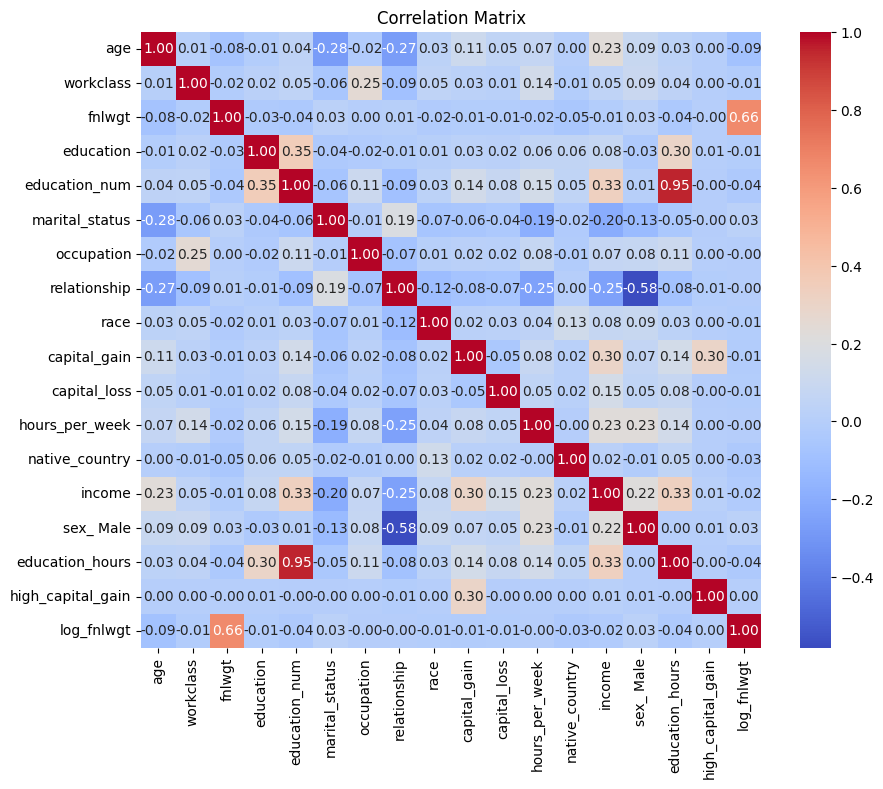

In [26]:
# Correlation Matrix for comparison
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:
# Display final dataset information
print("\nFinal dataset shape:", df.shape)


Final dataset shape: (32235, 18)


In [29]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male,education_hours,high_capital_gain,log_fnlwgt
0,0.030671,7.0,-1.063611,9.0,1.134739,4.0,1.0,1.0,4.0,0.021740,0.0,0.397959,39.0,0.0,1.0,0.451580,0.0,0.006654
1,0.837109,6.0,-1.008707,9.0,1.134739,2.0,4.0,0.0,4.0,0.000000,0.0,0.122449,39.0,0.0,1.0,0.138948,0.0,0.006654
2,-0.042642,4.0,0.245079,11.0,-0.420060,0.0,6.0,1.0,4.0,0.000000,0.0,0.397959,39.0,0.0,1.0,-0.167167,0.0,0.219199
3,1.057047,4.0,0.425801,1.0,-1.197459,2.0,6.0,0.0,2.0,0.000000,0.0,0.397959,39.0,0.0,1.0,-0.476540,0.0,0.354734
4,-0.775768,4.0,1.408176,9.0,1.134739,2.0,10.0,5.0,2.0,0.000000,0.0,0.397959,5.0,0.0,0.0,0.451580,0.0,0.878869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,4.0,0.639741,7.0,0.746039,2.0,13.0,5.0,4.0,0.000000,0.0,0.377551,39.0,0.0,0.0,0.281668,0.0,0.494538
32557,0.103983,4.0,-0.335433,11.0,-0.420060,2.0,7.0,0.0,4.0,0.000000,0.0,0.397959,39.0,1.0,1.0,-0.167167,0.0,-0.408619
32558,1.423610,4.0,-0.358777,11.0,-0.420060,6.0,1.0,4.0,4.0,0.000000,0.0,0.397959,39.0,0.0,0.0,-0.167167,0.0,-0.444379
32559,-1.215643,4.0,0.110960,11.0,-0.420060,4.0,1.0,3.0,4.0,0.000000,0.0,0.193878,39.0,0.0,1.0,-0.081440,0.0,0.105224


In [28]:
# Pros and Cons of Outlier Detection:
# Isolation Forest: Effective for high-dimensional data. May require tuning contamination.
# PPS Score: Captures non-linear relationships better than correlation. Computationally expensive for large datasets.